In [343]:
# Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
#from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from prophet import Prophet

In [344]:
# Load dataset
df = pd.read_csv("cleaned_dataset.csv")
df_base = df
df["Date"] = pd.to_datetime(df["Date"])

# Group Date to have good mean
df = df.groupby("Date").agg({
    "Average delay of late trains at departure": "mean",
    "Average delay of late trains at arrival": "mean",
    "Average journey time": "mean",
}).reset_index()

In [345]:
# Prediction Model creator

# y the parameter we need to predicted base on X
X = df[["Date"]]
y_departure = df["Average delay of late trains at departure"]
y_arrival = df["Average delay of late trains at arrival"]


In [346]:
# test best nbr of n_estimator

def best_estimators(dates, X, y_test, column):
    n_estimators_list = range(10, 210, 10)

    # test best number of _estimator
    rmse_list = []
    r2_list = []
    for n in n_estimators_list:
        model = RandomForestRegressor(n_estimators=n, random_state=42)
        model.fit(X, y_test)
        pred = model.predict(X)

        # Create a dataset with date and predicted data
        df_test = pd.DataFrame({
            "Date": dates,
            "Predicted Delay": pred
        })
        # Sort the date
        df_test = df_test.sort_values("Date")

        df_test["Real Delay"] = df.loc[X.index, column].values

        rmse = np.sqrt(mean_squared_error(df_test["Real Delay"], df_test["Predicted Delay"]))
        r2 = r2_score(df_test["Real Delay"], df_test["Predicted Delay"])

        rmse_list.append(rmse)
        r2_list.append(r2)

        print(f"n_estimators={n} => RMSE: {rmse:.3f}, R²: {r2:.3f}")
    best_idx = np.argmin(rmse_list)
    print(f"\n👉 Meilleur RMSE = {rmse_list[best_idx]:.3f} avec n_estimators = {n_estimators_list[best_idx]}")

Departure

In [347]:
#X_train, X_test, y_train, y_test = train_test_split(X, y_departure, test_size=0.2, random_state=42)

X_train = X
X_test = X
y_train = y_departure
y_test = y_departure

RMSE: 8.43
R²: 0.10


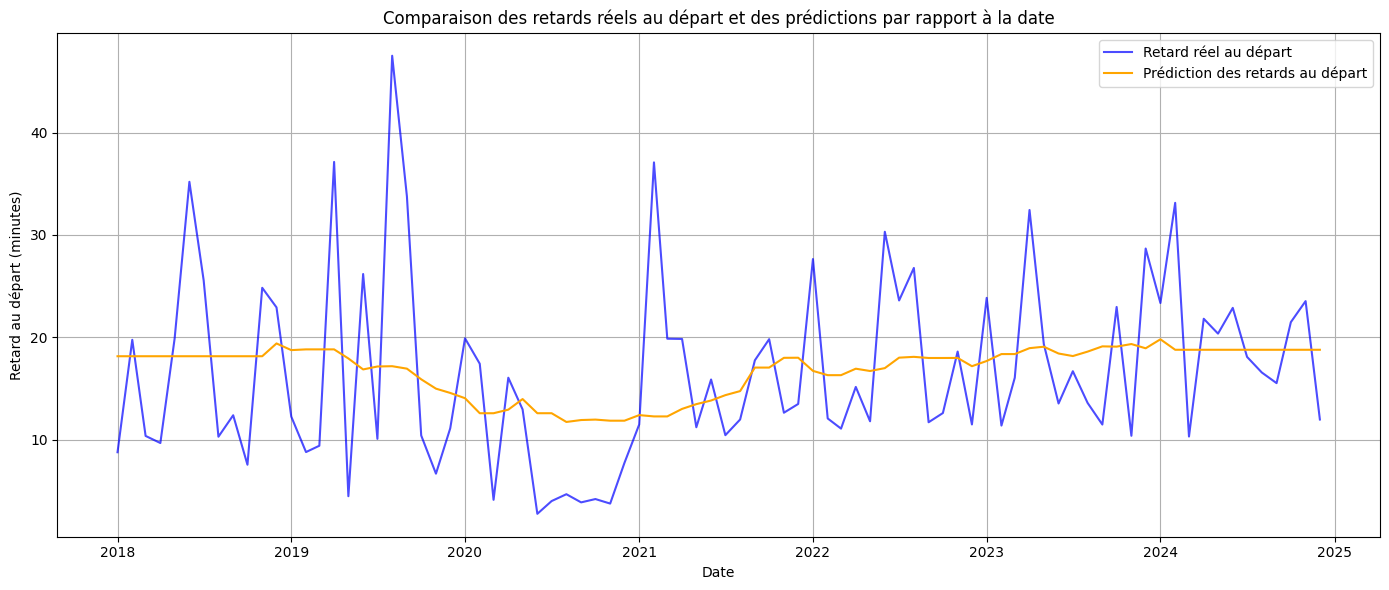

In [348]:
# Look at the best nbr of estimator
model_departure = GridSearchCV(
    estimator=KNeighborsRegressor(),
    param_grid={"n_neighbors": range(1, 21)},
    cv=5,  # 5-fold cross-validation
    scoring="neg_root_mean_squared_error",  # RMSE
    n_jobs=-1,  # use all processor hearts
)
a = model_departure.fit(X_train, y_train)
model_departure = model_departure.best_estimator_
# Use the model on the data
pred_departure = model_departure.predict(X_test)

# Find the date with the position
dates = df.loc[X_test.index, "Date"]

#best_estimators(dates, X, y_departure, "Average delay of late trains at departure")
# Create a dataset with date and predicted data
df_pred_departure = pd.DataFrame({
    "Date": dates,
    "Predicted departure Delay": pred_departure
})
# Sort the date
df_pred_departure = df_pred_departure.sort_values("Date")

# Get the Real Delay
df_pred_departure["Real departure Delay"] = df.loc[X_test.index, "Average delay of late trains at departure"].values

rmse = np.sqrt(mean_squared_error(df_pred_departure["Real departure Delay"], df_pred_departure["Predicted departure Delay"]))
r2 = r2_score(df_pred_departure["Real departure Delay"], df_pred_departure["Predicted departure Delay"])

print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

# Make a plot with Real and predict data
plt.figure(figsize=(14, 6))
plt.plot(df_pred_departure["Date"], df_pred_departure["Real departure Delay"], label="Retard réel au départ", color="blue", alpha=0.7)
plt.plot(df_pred_departure["Date"], df_pred_departure["Predicted departure Delay"], label="Prédiction des retards au départ", color="orange")
plt.title("Comparaison des retards réels au départ et des prédictions par rapport à la date")
plt.xlabel("Date")
plt.ylabel("Retard au départ (minutes)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

RMSE: 8.43
R²: 0.11


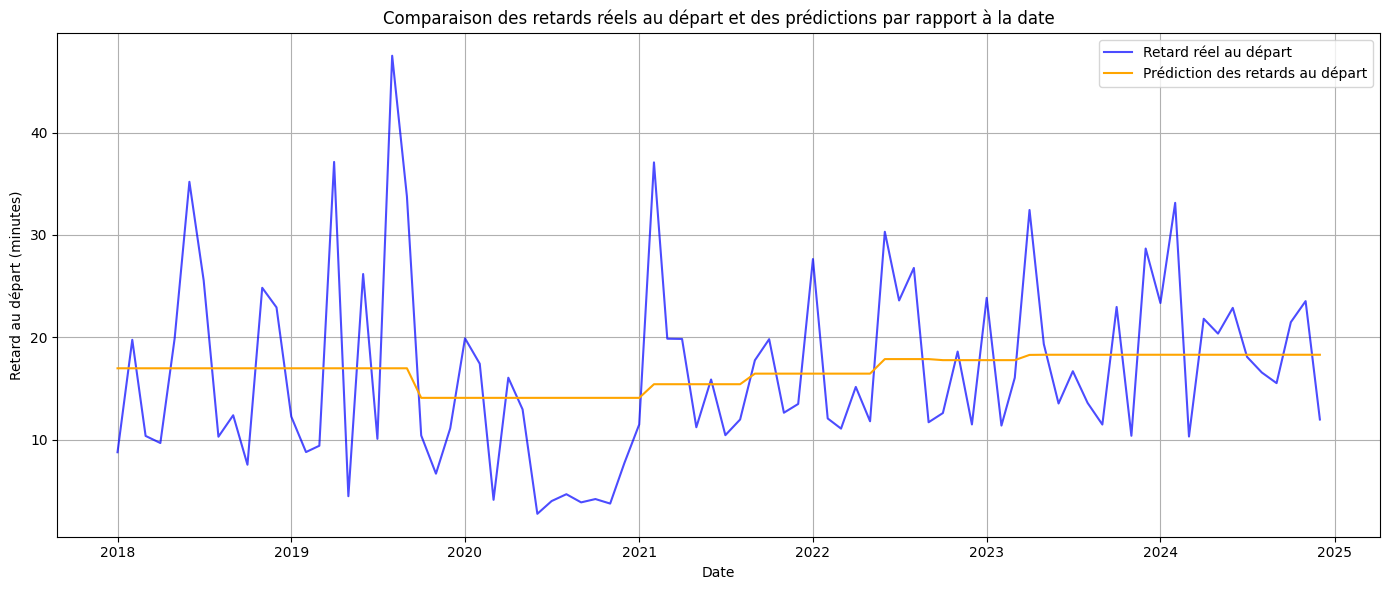

In [349]:
# Look at the best nbr of estimator

model_departure = GridSearchCV(
    estimator=HistGradientBoostingRegressor(random_state=42),
    param_grid={"max_iter": range(10, 210, 10)},
    cv=5,  # 5-fold cross-validation
    scoring="neg_root_mean_squared_error",  # RMSE
    n_jobs=-1,  # use all processor hearts
)
a = model_departure.fit(X_train, y_train)
model_departure = model_departure.best_estimator_
# Use the model on the data
pred_departure = model_departure.predict(X_test)

# Find the date with the position
dates = df.loc[X_test.index, "Date"]

#best_estimators(dates, X, y_departure, "Average delay of late trains at departure")
# Create a dataset with date and predicted data
df_pred_departure = pd.DataFrame({
    "Date": dates,
    "Predicted departure Delay": pred_departure
})
# Sort the date
df_pred_departure = df_pred_departure.sort_values("Date")

# Get the Real Delay
df_pred_departure["Real departure Delay"] = df.loc[X_test.index, "Average delay of late trains at departure"].values

rmse = np.sqrt(mean_squared_error(df_pred_departure["Real departure Delay"], df_pred_departure["Predicted departure Delay"]))
r2 = r2_score(df_pred_departure["Real departure Delay"], df_pred_departure["Predicted departure Delay"])

print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

# Make a plot with Real and predict data
plt.figure(figsize=(14, 6))
plt.plot(df_pred_departure["Date"], df_pred_departure["Real departure Delay"], label="Retard réel au départ", color="blue", alpha=0.7)
plt.plot(df_pred_departure["Date"], df_pred_departure["Predicted departure Delay"], label="Prédiction des retards au départ", color="orange")
plt.title("Comparaison des retards réels au départ et des prédictions par rapport à la date")
plt.xlabel("Date")
plt.ylabel("Retard au départ (minutes)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

RMSE: 3.72
R²: 0.83


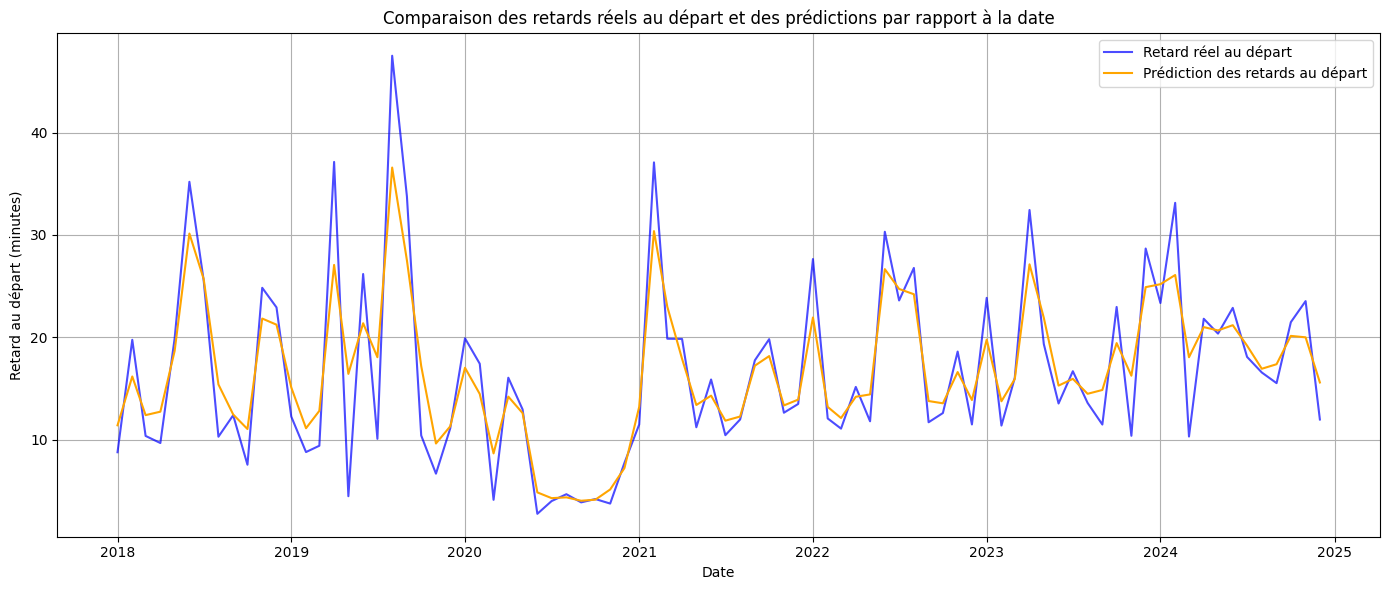

In [350]:
# Look at the best nbr of estimator

model_departure = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid={"n_estimators": range(10, 210, 10)},
    cv=5,  # 5-fold cross-validation
    scoring="neg_root_mean_squared_error",  # RMSE
    n_jobs=-1,  # use all processor hearts
)
a = model_departure.fit(X_train, y_train)
model_departure = model_departure.best_estimator_
# Use the model on the data
pred_departure = model_departure.predict(X_test)

# Find the date with the position
dates = df.loc[X_test.index, "Date"]

#best_estimators(dates, X, y_departure, "Average delay of late trains at departure")
# Create a dataset with date and predicted data
df_pred_departure = pd.DataFrame({
    "Date": dates,
    "Predicted departure Delay": pred_departure
})
# Sort the date
df_pred_departure = df_pred_departure.sort_values("Date")

# Get the Real Delay
df_pred_departure["Real departure Delay"] = df.loc[X_test.index, "Average delay of late trains at departure"].values

rmse = np.sqrt(mean_squared_error(df_pred_departure["Real departure Delay"], df_pred_departure["Predicted departure Delay"]))
r2 = r2_score(df_pred_departure["Real departure Delay"], df_pred_departure["Predicted departure Delay"])

print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

# Make a plot with Real and predict data
plt.figure(figsize=(14, 6))
plt.plot(df_pred_departure["Date"], df_pred_departure["Real departure Delay"], label="Retard réel au départ", color="blue", alpha=0.7)
plt.plot(df_pred_departure["Date"], df_pred_departure["Predicted departure Delay"], label="Prédiction des retards au départ", color="orange")
plt.title("Comparaison des retards réels au départ et des prédictions par rapport à la date")
plt.xlabel("Date")
plt.ylabel("Retard au départ (minutes)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Arrival

In [351]:
# X_train, X_test, y_train, y_test = train_test_split(X, y_arrival, test_size=0.2, random_state=42)

X_train = X
X_test = X
y_test = y_arrival
y_train = y_arrival

RMSE: 25.07
R²: 0.03


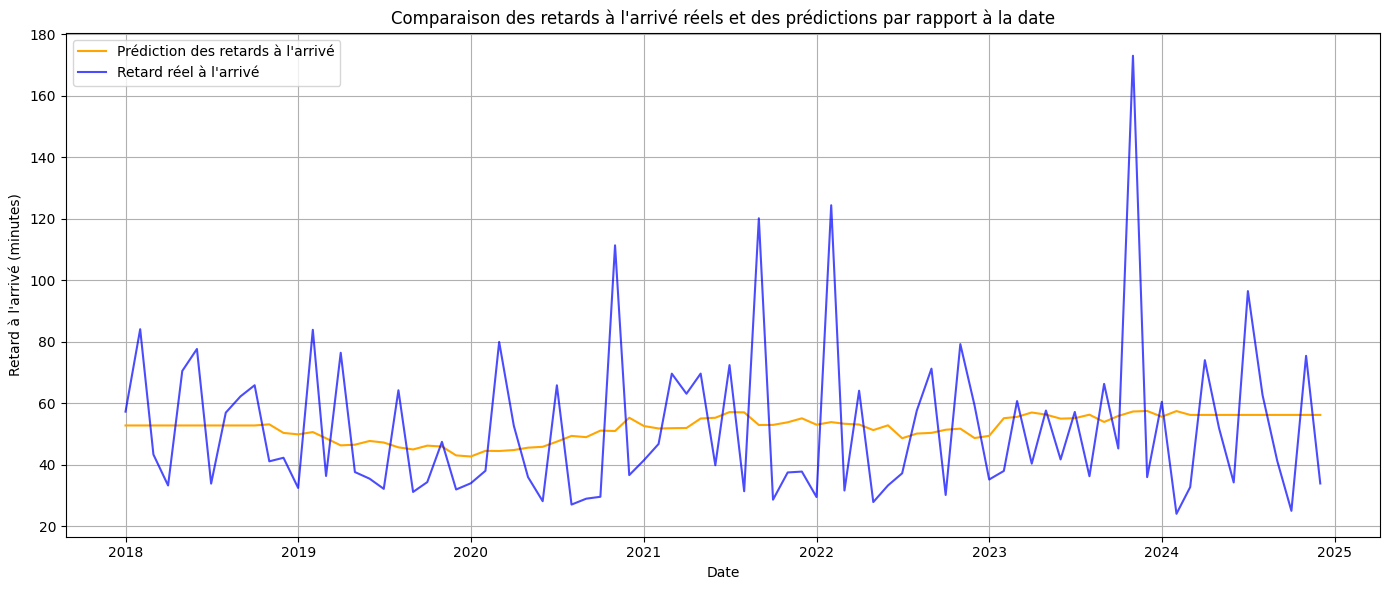

In [352]:
model_arrival = GridSearchCV(
    estimator=KNeighborsRegressor(),
    param_grid={"n_neighbors": range(1, 21)},
    cv=5,  # 5-fold cross-validation
    scoring="neg_root_mean_squared_error",  # opti RMSE
    n_jobs=-1,  # use all processor hearts
)
model_arrival.fit(X_train, y_train)
model_arrival = model_arrival.best_estimator_

# Use the model on the data
pred_arrival = model_arrival.predict(X_test)

# Find the date with the position
dates = df.loc[X_test.index, "Date"]

#best_estimators(dates, X, y_arrival, "Average delay of late trains at arrival")
# Create a dataset with date and predicted data
df_pred_arrival = pd.DataFrame({
    "Date": dates,
    "Predicted arrival Delay": pred_arrival
})
# Sort the date
df_pred_arrival = df_pred_arrival.sort_values("Date")

# Get the Real Delay
df_pred_arrival["Real arrival Delay"] = df.loc[X_test.index, "Average delay of late trains at arrival"].values

# RMSE and R²
rmse = np.sqrt(mean_squared_error(df_pred_arrival["Real arrival Delay"], df_pred_arrival["Predicted arrival Delay"]))
r2 = r2_score(df_pred_arrival["Real arrival Delay"], df_pred_arrival["Predicted arrival Delay"])
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

# Plot
plt.figure(figsize=(14, 6))
plt.plot(df_pred_arrival["Date"], df_pred_arrival["Predicted arrival Delay"], label="Prédiction des retards à l'arrivé", color="orange")
plt.plot(df_pred_arrival["Date"], df_pred_arrival["Real arrival Delay"], label="Retard réel à l'arrivé", color="blue", alpha=0.7)
plt.title("Comparaison des retards à l'arrivé réels et des prédictions par rapport à la date")
plt.xlabel("Date")
plt.ylabel("Retard à l'arrivé (minutes)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

RMSE: 25.12
R²: 0.02


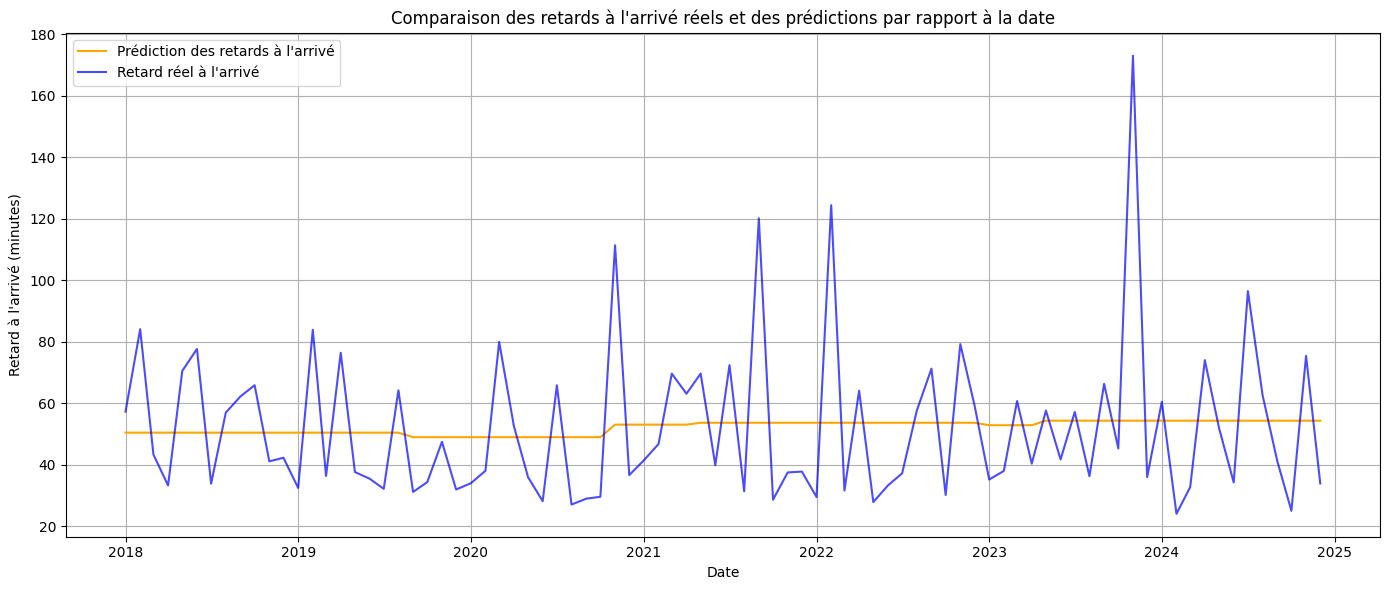

In [353]:
model_arrival = GridSearchCV(
    estimator=HistGradientBoostingRegressor(random_state=42),
    param_grid={"max_iter": range(10, 210, 10)},
    cv=5,  # 5-fold cross-validation
    scoring="neg_root_mean_squared_error",  # opti RMSE
    n_jobs=-1,  # use all processor hearts
)
model_arrival.fit(X_train, y_train)
model_arrival = model_arrival.best_estimator_

# Use the model on the data
pred_arrival = model_arrival.predict(X_test)

# Find the date with the position
dates = df.loc[X_test.index, "Date"]

#best_estimators(dates, X, y_arrival, "Average delay of late trains at arrival")
# Create a dataset with date and predicted data
df_pred_arrival = pd.DataFrame({
    "Date": dates,
    "Predicted arrival Delay": pred_arrival
})
# Sort the date
df_pred_arrival = df_pred_arrival.sort_values("Date")

# Get the Real Delay
df_pred_arrival["Real arrival Delay"] = df.loc[X_test.index, "Average delay of late trains at arrival"].values

# RMSE and R²
rmse = np.sqrt(mean_squared_error(df_pred_arrival["Real arrival Delay"], df_pred_arrival["Predicted arrival Delay"]))
r2 = r2_score(df_pred_arrival["Real arrival Delay"], df_pred_arrival["Predicted arrival Delay"])
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

# Plot
plt.figure(figsize=(14, 6))
plt.plot(df_pred_arrival["Date"], df_pred_arrival["Predicted arrival Delay"], label="Prédiction des retards à l'arrivé", color="orange")
plt.plot(df_pred_arrival["Date"], df_pred_arrival["Real arrival Delay"], label="Retard réel à l'arrivé", color="blue", alpha=0.7)
plt.title("Comparaison des retards à l'arrivé réels et des prédictions par rapport à la date")
plt.xlabel("Date")
plt.ylabel("Retard à l'arrivé (minutes)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

RMSE: 12.56
R²: 0.76


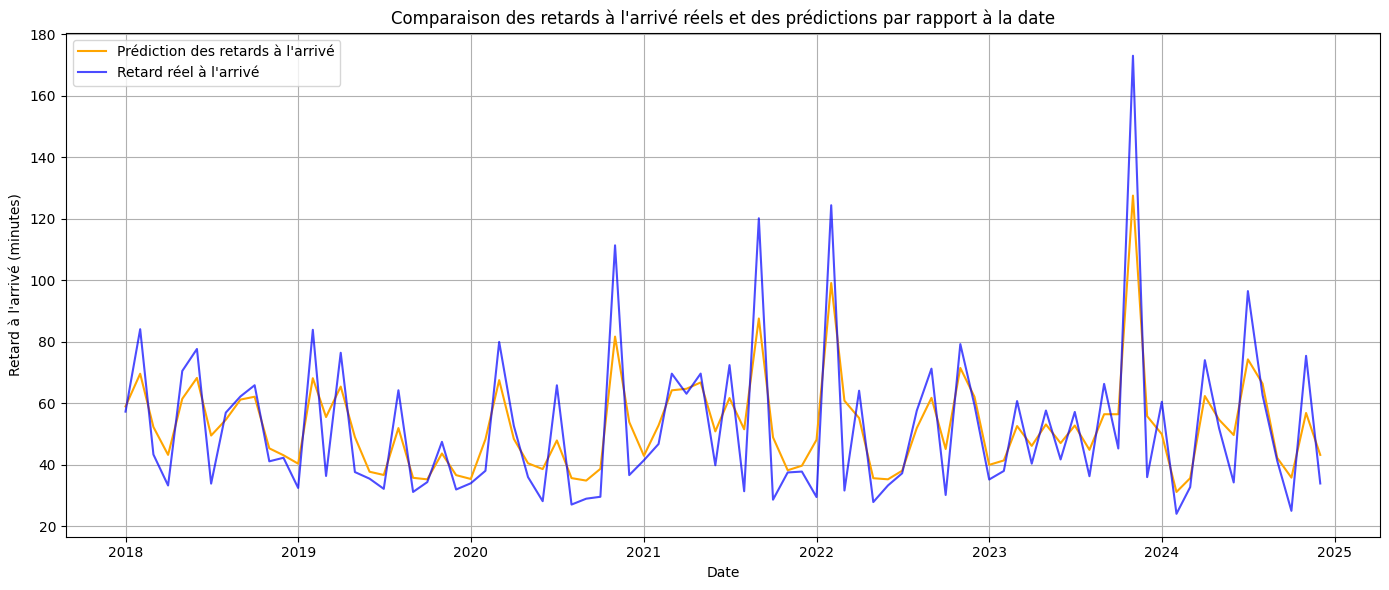

In [354]:
model_arrival = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid={"n_estimators": range(10, 210, 10)},
    cv=5,  # 5-fold cross-validation
    scoring="neg_root_mean_squared_error",  # opti RMSE
    n_jobs=-1,  # use all processor hearts
)
model_arrival.fit(X_train, y_train)
model_arrival = model_arrival.best_estimator_

# Use the model on the data
pred_arrival = model_arrival.predict(X_test)

# Find the date with the position
dates = df.loc[X_test.index, "Date"]

#best_estimators(dates, X, y_arrival, "Average delay of late trains at arrival")
# Create a dataset with date and predicted data
df_pred_arrival = pd.DataFrame({
    "Date": dates,
    "Predicted arrival Delay": pred_arrival
})
# Sort the date
df_pred_arrival = df_pred_arrival.sort_values("Date")

# Get the Real Delay
df_pred_arrival["Real arrival Delay"] = df.loc[X_test.index, "Average delay of late trains at arrival"].values

# RMSE and R²
rmse = np.sqrt(mean_squared_error(df_pred_arrival["Real arrival Delay"], df_pred_arrival["Predicted arrival Delay"]))
r2 = r2_score(df_pred_arrival["Real arrival Delay"], df_pred_arrival["Predicted arrival Delay"])
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

# Plot
plt.figure(figsize=(14, 6))
plt.plot(df_pred_arrival["Date"], df_pred_arrival["Predicted arrival Delay"], label="Prédiction des retards à l'arrivé", color="orange")
plt.plot(df_pred_arrival["Date"], df_pred_arrival["Real arrival Delay"], label="Retard réel à l'arrivé", color="blue", alpha=0.7)
plt.title("Comparaison des retards à l'arrivé réels et des prédictions par rapport à la date")
plt.xlabel("Date")
plt.ylabel("Retard à l'arrivé (minutes)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Departure + Arrival

RMSE: 12.95
R²: 0.76


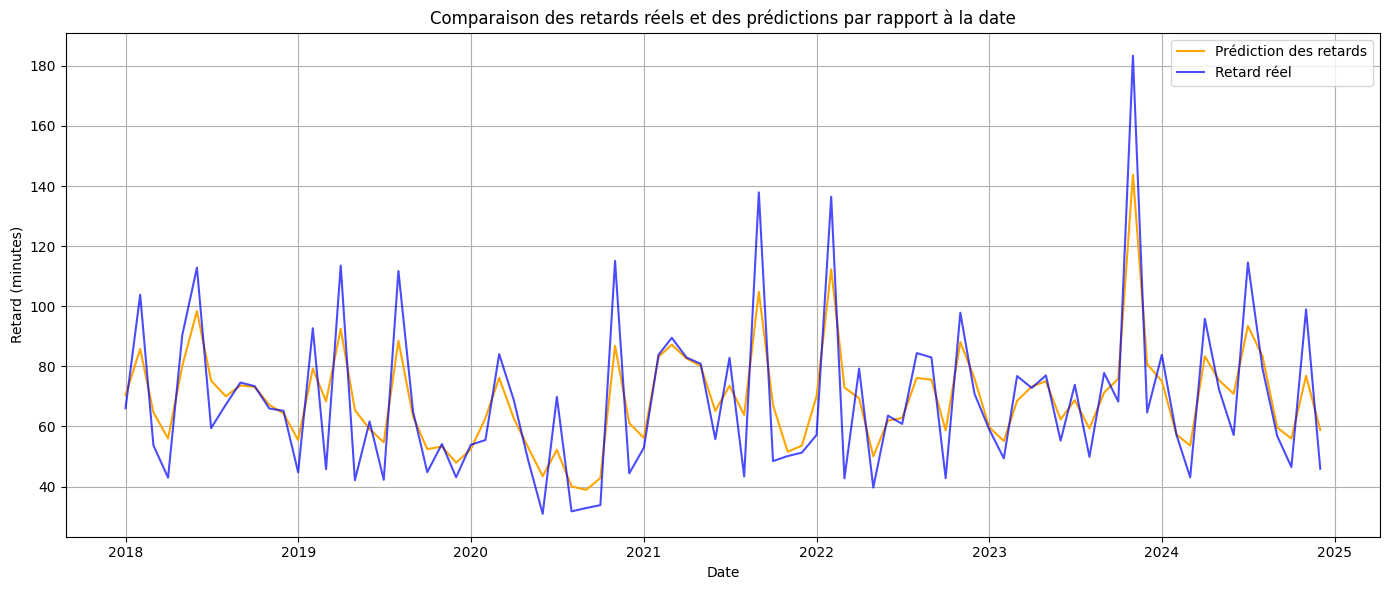

In [355]:
# Create a dataset with date and predicted data
df_pred = pd.DataFrame({
    "Date": dates,
    "Predicted Delay": pred_arrival + pred_departure
})
# Sort the date
df_pred = df_pred.sort_values("Date")

# Get the Real Delay
df_pred["Real Delay"] = df.loc[X_test.index, "Average delay of late trains at arrival"].values + df.loc[X_test.index, "Average delay of late trains at departure"].values


rmse = np.sqrt(mean_squared_error(df_pred["Real Delay"], df_pred["Predicted Delay"]))
r2 = r2_score(df_pred["Real Delay"], df_pred["Predicted Delay"])

print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")
# Make a plot with Real and predict data
plt.figure(figsize=(14, 6))
plt.plot(df_pred["Date"], df_pred["Predicted Delay"], label="Prédiction des retards", color="orange")
plt.plot(df_pred["Date"], df_pred["Real Delay"], label="Retard réel", color="blue", alpha=0.7)
plt.title("Comparaison des retards réels et des prédictions par rapport à la date")
plt.xlabel("Date")
plt.ylabel("Retard (minutes)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Time 

In [356]:
# Prediction Model creator

# y the parameter we need to predicted base on X
X = df[["Date"]]
y_time = df["Average journey time"]


In [357]:
# X_train, X_test, y_train, y_test = train_test_split(X, y_time, test_size=0.2, random_state=42)

X_train = X
X_test = X
y_train = y_time
y_test = y_time

RMSE: 26.24
R²: 0.14


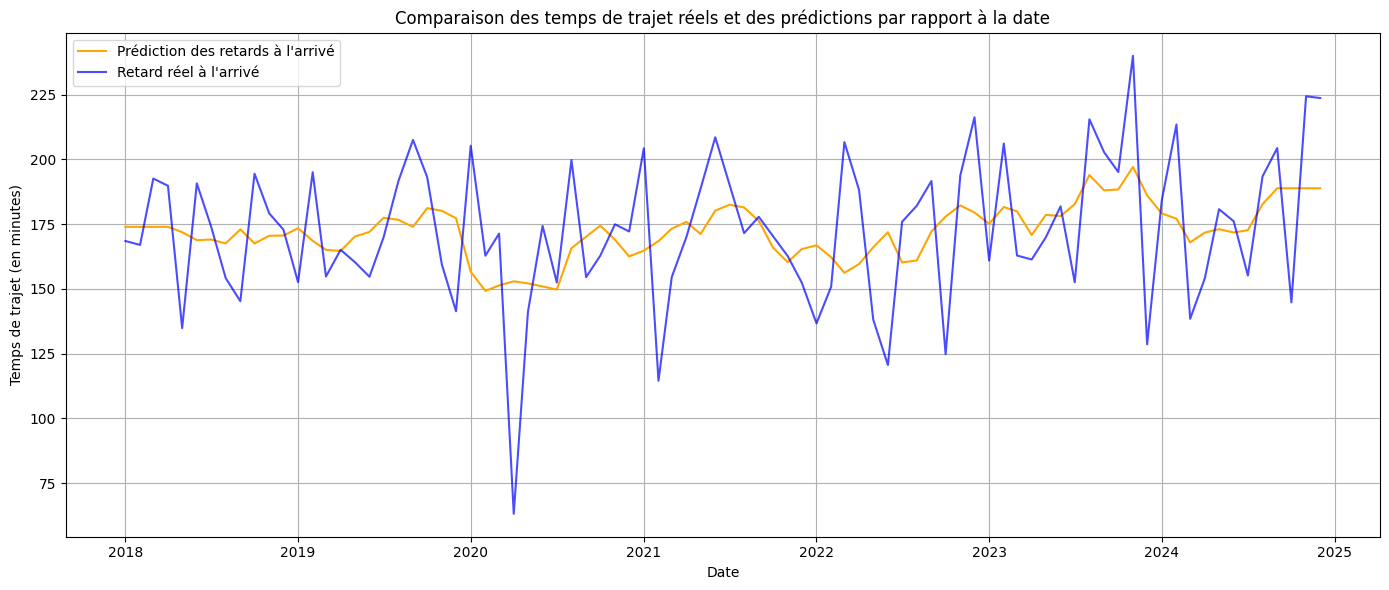

In [358]:
model_time = GridSearchCV(
    estimator=KNeighborsRegressor(),
    param_grid={"n_neighbors": range(1, 21)},
    cv=5,  # 5-fold cross-validation
    scoring="neg_root_mean_squared_error",  # opti RMSE
    n_jobs=-1,  # use all processor hearts
)
model_time.fit(X_train, y_train)
model_time = model_time.best_estimator_

# Use the model on the data
pred_time = model_time.predict(X_test)

# Find the date with the position
dates = df.loc[X_test.index, "Date"]

#best_estimators(dates, X, y_arrival, "Average delay of late trains at arrival")
# Create a dataset with date and predicted data
df_pred_time = pd.DataFrame({
    "Date": dates,
    "Predicted Time": pred_time
})
# Sort the date
df_pred_time = df_pred_time.sort_values("Date")

# Get tTime
df_pred_time["Real Time"] = df.loc[X_test.index, "Average journey time"].values

# RMSE and R²
rmse = np.sqrt(mean_squared_error(df_pred_time["Real Time"], df_pred_time["Predicted Time"]))
r2 = r2_score(df_pred_time["Real Time"], df_pred_time["Predicted Time"])
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

# Plot
plt.figure(figsize=(14, 6))
plt.plot(df_pred_time["Date"], df_pred_time["Predicted Time"], label="Prédiction des retards à l'arrivé", color="orange")
plt.plot(df_pred_time["Date"], df_pred_time["Real Time"], label="Retard réel à l'arrivé", color="blue", alpha=0.7)
plt.title("Comparaison des temps de trajet réels et des prédictions par rapport à la date")
plt.xlabel("Date")
plt.ylabel("Temps de trajet (en minutes)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

RMSE: 27.12
R²: 0.08


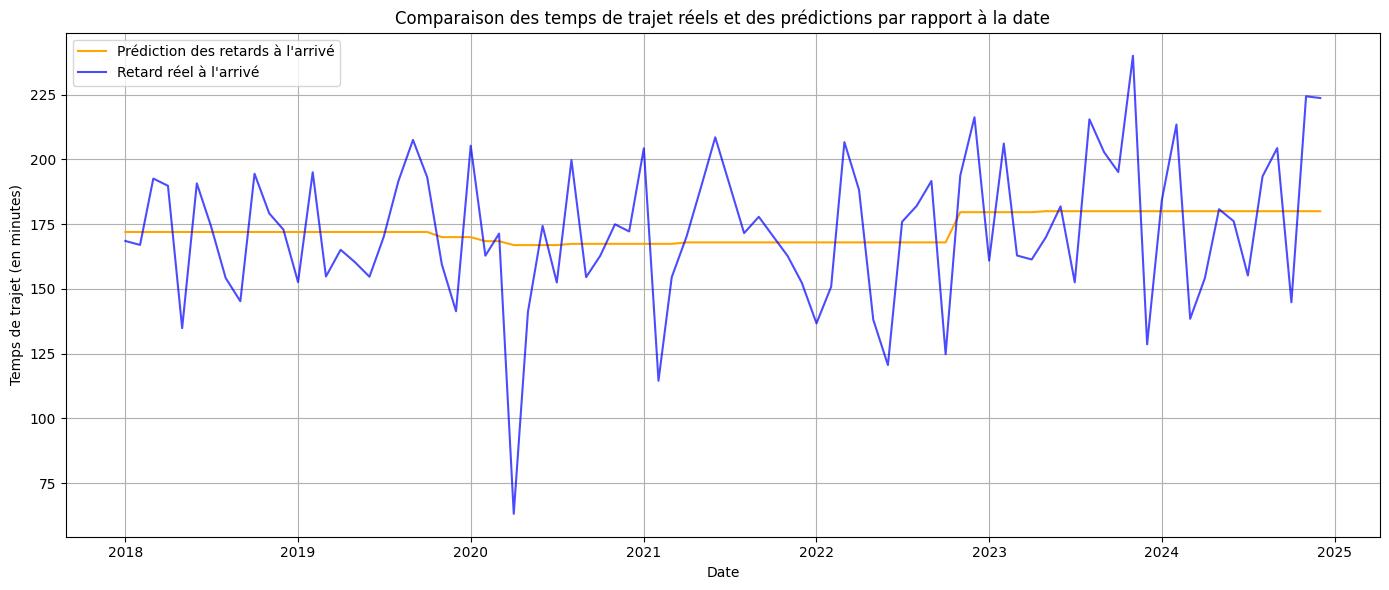

In [359]:
model_time = GridSearchCV(
    estimator=HistGradientBoostingRegressor(random_state=42),
    param_grid={"max_iter": range(10, 210, 10)},
    cv=5,  # 5-fold cross-validation
    scoring="neg_root_mean_squared_error",  # opti RMSE
    n_jobs=-1,  # use all processor hearts
)
model_time.fit(X_train, y_train)
model_time = model_time.best_estimator_

# Use the model on the data
pred_time = model_time.predict(X_test)

# Find the date with the position
dates = df.loc[X_test.index, "Date"]

#best_estimators(dates, X, y_arrival, "Average delay of late trains at arrival")
# Create a dataset with date and predicted data
df_pred_time = pd.DataFrame({
    "Date": dates,
    "Predicted Time": pred_time
})
# Sort the date
df_pred_time = df_pred_time.sort_values("Date")

# Get tTime
df_pred_time["Real Time"] = df.loc[X_test.index, "Average journey time"].values

# RMSE and R²
rmse = np.sqrt(mean_squared_error(df_pred_time["Real Time"], df_pred_time["Predicted Time"]))
r2 = r2_score(df_pred_time["Real Time"], df_pred_time["Predicted Time"])
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

# Plot
plt.figure(figsize=(14, 6))
plt.plot(df_pred_time["Date"], df_pred_time["Predicted Time"], label="Prédiction des retards à l'arrivé", color="orange")
plt.plot(df_pred_time["Date"], df_pred_time["Real Time"], label="Retard réel à l'arrivé", color="blue", alpha=0.7)
plt.title("Comparaison des temps de trajet réels et des prédictions par rapport à la date")
plt.xlabel("Date")
plt.ylabel("Temps de trajet (en minutes)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

RMSE: 12.01
R²: 0.82


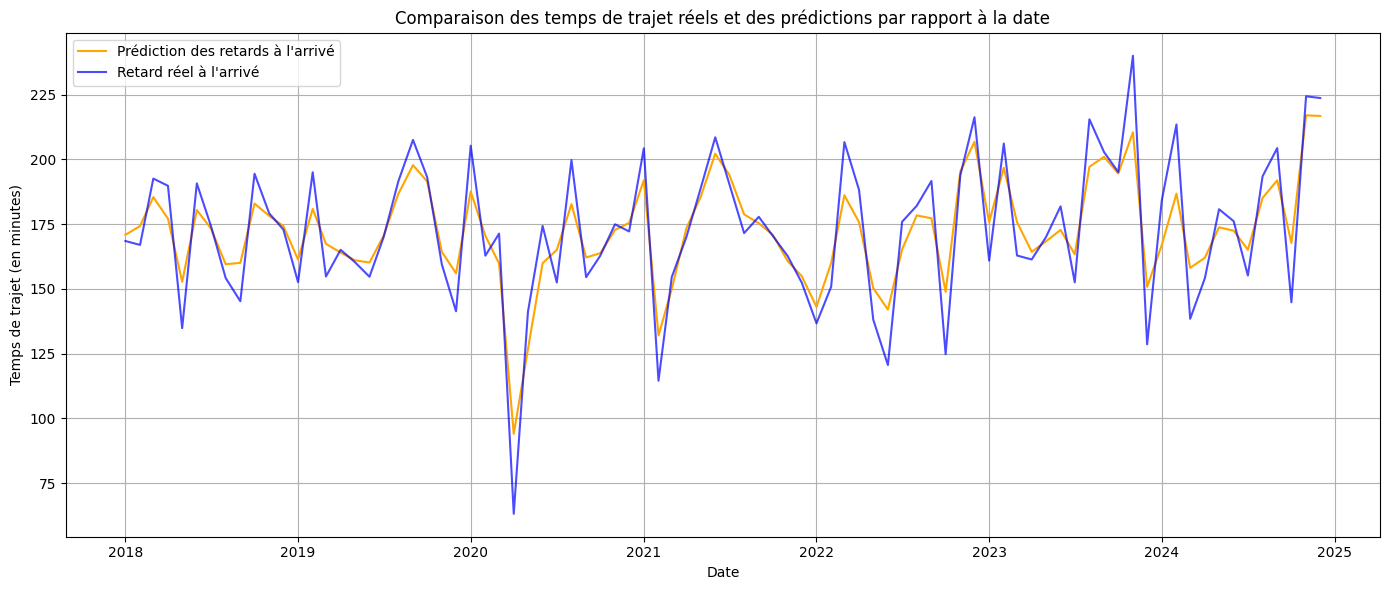

In [360]:
model_time = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid={"n_estimators": range(10, 210, 10)},
    cv=5,  # 5-fold cross-validation
    scoring="neg_root_mean_squared_error",  # opti RMSE
    n_jobs=-1,  # use all processor hearts
)
model_time.fit(X_train, y_train)
model_time = model_time.best_estimator_

# Use the model on the data
pred_time = model_time.predict(X_test)

# Find the date with the position
dates = df.loc[X_test.index, "Date"]

# best_estimators(dates, X, y_arrival, "Average delay of late trains at arrival")
# Create a dataset with date and predicted data
df_pred_time = pd.DataFrame({
    "Date": dates,
    "Predicted Time": pred_time
})
# Sort the date
df_pred_time = df_pred_time.sort_values("Date")

# Get tTime
df_pred_time["Real Time"] = df.loc[X_test.index, "Average journey time"].values

# RMSE and R²
rmse = np.sqrt(mean_squared_error(df_pred_time["Real Time"], df_pred_time["Predicted Time"]))
r2 = r2_score(df_pred_time["Real Time"], df_pred_time["Predicted Time"])
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

# Plot
plt.figure(figsize=(14, 6))
plt.plot(df_pred_time["Date"], df_pred_time["Predicted Time"], label="Prédiction des retards à l'arrivé", color="orange")
plt.plot(df_pred_time["Date"], df_pred_time["Real Time"], label="Retard réel à l'arrivé", color="blue", alpha=0.7)
plt.title("Comparaison des temps de trajet réels et des prédictions par rapport à la date")
plt.xlabel("Date")
plt.ylabel("Temps de trajet (en minutes)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

/home/pierre-m/delivery/semester2/AIA/tardis/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/pierre-m/delivery/semester2/AIA/tardis/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


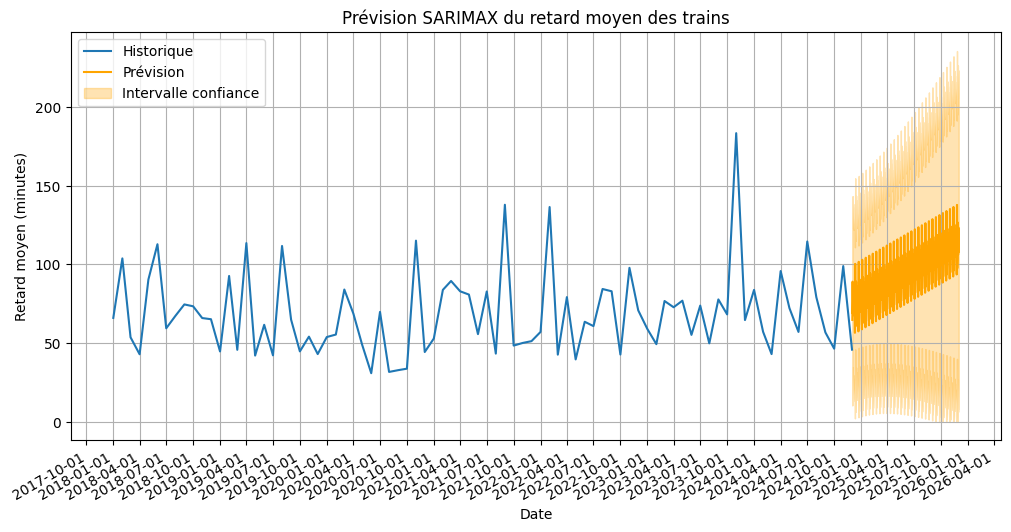

In [361]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.dates as mdates

# Prep data
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
y = df['Average delay of late trains at departure'] + df['Average delay of late trains at arrival']

# SARIMAX model
model = SARIMAX(y, order=(1,1,1), seasonal_order=(1,1,1,12))
results = model.fit()

# prediction next year
steps = 365
forecast = results.get_forecast(steps=steps)
predicted_mean = forecast.predicted_mean.clip(lower=0)  # éviter valeurs négatives
conf_int = forecast.conf_int()
conf_int[conf_int < 0] = 0  # bornes positives

# Futur dates
last_date = y.index[-1]
future_dates = pd.date_range(start=last_date, periods=steps+1, freq='D')[1:]

# Plot
plt.figure(figsize=(12,6))
plt.plot(y.index, y, label='Historique')
plt.plot(future_dates, predicted_mean, label='Prévision', color='orange')
plt.fill_between(future_dates, conf_int.iloc[:,0], conf_int.iloc[:,1], color='orange', alpha=0.3, label='Intervalle confiance')

# Format date
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1,4,7,10)))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()

plt.title("Prévision SARIMAX du retard moyen des trains")
plt.xlabel("Date")
plt.ylabel("Retard moyen (minutes)")
plt.legend()
plt.grid(True)
plt.show()

01:04:05 - cmdstanpy - INFO - Chain [1] start processing
01:04:05 - cmdstanpy - INFO - Chain [1] done processing


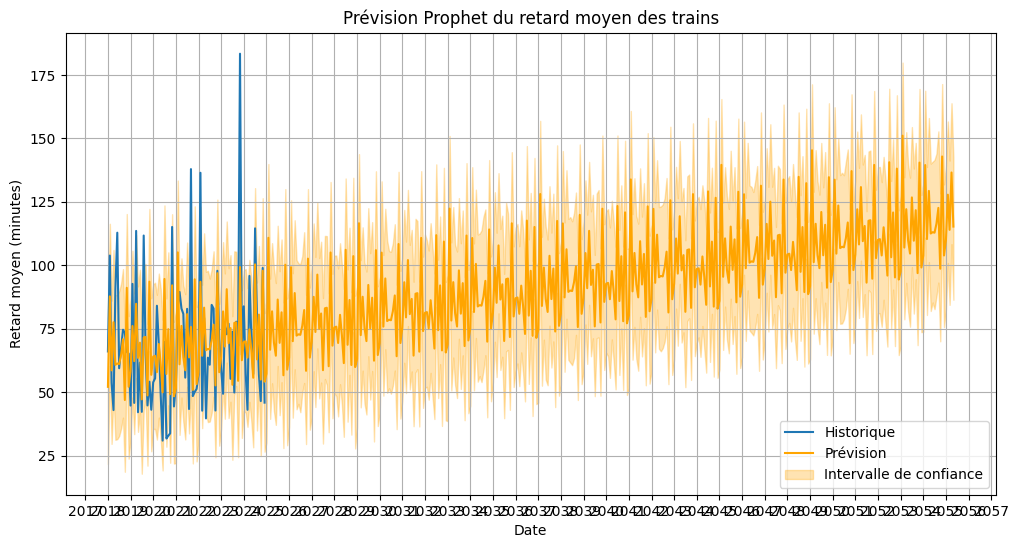

In [ ]:
from prophet import Prophet

# Si 'Date' est en index, on le remet en colonne ds
df_reset = df.reset_index().rename(columns={"Date": "ds"})

# Crée la variable cible y = somme des deux retards
df_reset['y'] = df_reset['Average delay of late trains at departure'] + df_reset['Average delay of late trains at arrival']

# Garde seulement ds et y
df_prophet = df_reset[['ds', 'y']]

# Modèle Prophet
model = Prophet()
model.fit(df_prophet)

# Futur 365 jours
future = model.make_future_dataframe(periods=365, freq='MS')  # MS = Month Start si tes données sont mensuelles
forecast = model.predict(future)

# Plot
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(df_prophet['ds'], df_prophet['y'], label='Historique')
ax.plot(forecast['ds'], forecast['yhat'], label='Prévision', color='orange')
ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], 
                color='orange', alpha=0.3, label='Intervalle de confiance')

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gcf().autofmt_xdate()

plt.title("Prévision Prophet du retard moyen des trains")
plt.xlabel("Date")
plt.ylabel("Retard moyen (minutes)")
plt.legend()
plt.grid(True)
plt.show()